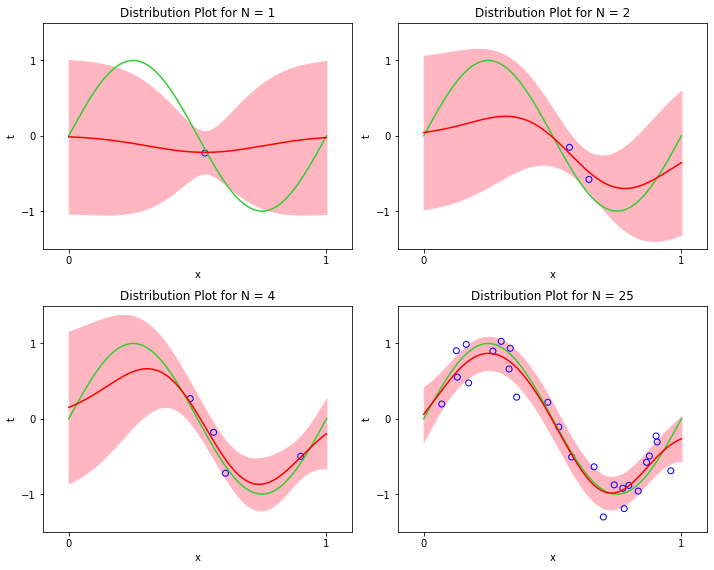

In [ ]:
#Danny Hong, Arthur Skok, and Dan Brody

import matplotlib.pyplot as plt
import numpy as np

β = 25 #Declaring the precision parameter beta

N_list = [1, 2, 4, 25] #List containing the four observation counts

figure = plt.figure(figsize=[10, 8]) #Setting up the figure for plotting later

#Creating a function that calculates and returns the kernel
def kernel_function(x, x_prime):
    return np.exp((-(np.absolute(x - x_prime))**2)/(2 * .05))

#Looping through all the four observation counts
for i in range(len(N_list)):
  x = np.atleast_2d(np.random.uniform(0, 1, N_list[i])) #Drawing the N samples from a uniform distribution
  
  #Creating a sine function with the N samples as inputs and then adding Gaussian Noise to the function
  noise = np.random.normal(0, np.sqrt(1/β), N_list[i])  
  t = np.sin(2 * np.pi *x) + noise  

  C_n = np.zeros((N_list[i], N_list[i])) #Setting up the covariance matrix

  #Using Eqn. 6.62 to get the covariance matrix
  for j in range(N_list[i]):
    for k in range(N_list[i]): 
      if (j == k):
        C_n[j, k] = kernel_function(x[0, j], x[0, k]) + (1/β)
      else:
        C_n[j, k] = kernel_function(x[0, j], x[0, k])

  #Creating the x values that will used as inputs for getting the kernel value for the posterior distribution and later for plotting.
  x_axis = np.linspace(0, 1, 1000)

  #Using Eqn. 6.66 to get the mean of the posterior distribution
  k = kernel_function(x.T, x_axis)
  mean = np.matmul(np.matmul(k.T, np.linalg.inv(C_n).T), t.T).squeeze() 

  #Using Eqn. 6.67 to get the standard deviation of the posterior distribution
  c = (1 + (1/β))
  std_dev = np.sqrt(c - np.diag((np.matmul(np.matmul(k.T, np.linalg.inv(C_n).T), k))))

  #Taking the respective sum and difference of the mean and the standard deviation
  sum = mean + std_dev
  diff = mean - std_dev
  
  x1 = np.linspace(0, 1, 1000) #Creating a set of x values that will be used as inputs to a sine function without additive Gaussian noise.
  y1 = np.sin(2 * np.pi * x1) #Creating a sine function without additive Gaussian noise.

  #Plotting the four predictive distribution subplots
  axes = plt.subplot(2, 2, i + 1)
  axes.set_xlabel('x')
  axes.set_ylabel('t')
  axes.set_xlim(-0.1, 1.1)
  axes.set_ylim(-1.5, 1.5)
  axes.set_xticks([0, 1])
  axes.set_yticks([-1, 0, 1])
  axes.plot(x1, y1, color = 'limegreen')
  axes.plot(x_axis, mean, color = 'red') 
  axes.fill_between(x_axis, sum, diff, color = 'lightpink') 
  plt.scatter(x, t, facecolors = 'none', edgecolors = 'blue')
  plt.title(f'Distribution Plot for N = {N_list[i]}') 
  plt.tight_layout(pad = 1)

plt.show()

#In summary, the goal of this project was to replicate the figures from 3.8 using a different method than the one used in Project 2. 
#Instead of utilizing linear regression, gaussian processes and kernel methods were used to obtain the mean and standard deviation of the posterior distribution.
#The graphs that were obtained in the end are extremely similar to the ones obtained from using linear regression. 

Extra Credit - Cross Validation

Our dataset can be found here: https://www.kaggle.com/imakash3011/customer-personality-analysis/version/1. The dataset has features such as consumer data like income and education as well as data on how much of each respective good each user bought. For our specific case we used the amount of wine people bought and binned accordingly to make a binary dataset where 0 corresponds to those who buy lower amounts of wine and 1 with those who buy higher amounts of wine. The specific features that were used to predict the binary label were income and education level. 

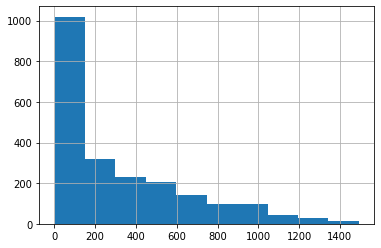

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import pandas as pd

#loading in data
df = pd.read_csv("marketing_campaign.csv", delimiter = "\t").dropna()
target_col = 'MntWines'

#looking at distribution of data

(df[df[target_col] > 0][target_col]).hist()

In [ ]:
#creating binary label from dataset

df['binary_label'] = pd.cut(df[df[target_col] > 0][target_col],2).astype('category').cat.codes

In [ ]:
null_idxs = df[df['binary_label'].isna() == True].index

In [ ]:
#dropping nulls

df = df.drop(null_idxs)

In [ ]:
df = df.reset_index().drop("index", axis = 1)

In [ ]:
#finding how much of each class

N1,N2 = (df['binary_label'].apply(lambda x : int(x))).value_counts().values

In [ ]:
#filtering columns
required_columns = ['Education',  'Income', 'binary_label']

for col in df.columns:
  if(col not in required_columns):
    df.drop(col,axis = 1, inplace = True)

In [ ]:
df['binary_label'] = df['binary_label'].astype('int')

In [ ]:
#converting categorical columns to numerical

cat_cols = ["Education"]
for j in cat_cols:
  df[j] = df[j].astype('category').cat.codes

In [ ]:
from sklearn.model_selection import train_test_split

#scaling data as is good practice and customary for svms

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('binary_label', axis = 1).values)
y = df['binary_label'].values

#splitting train, test, validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

In [ ]:
#declaring parameter ghrid for gridsearch and creating an instance of grid search

svc = svm.SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[2**-2,1,2**1,10], 'gamma' : [2**-2,1,2**1,10]}
clf = GridSearchCV(svc, parameters)

In [ ]:
#fitting params in grid search to validation to find best params

clf.fit(X_valid,y_valid)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.25, 1, 2, 10], 'gamma': [0.25, 1, 2, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#getting best params from grid search on validation

C = clf.get_params()['estimator__C']
kernel = clf.get_params()['estimator__kernel']
gamma = clf.get_params()['estimator__gamma']

In [ ]:
clf2 = svm.SVC(C = C, kernel = kernel, gamma = gamma, probability= True)

In [ ]:
#using results from grid search to fit svm to train set

clf2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

score : 0.8707482993197279
probability AUROC: 0.7878364995048168


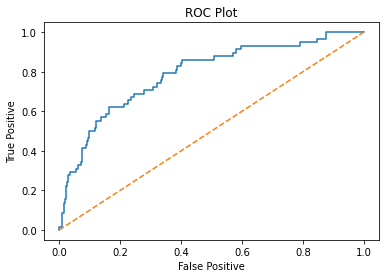

In [ ]:
#monitoring performance by comparing predictions vs. test set

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import numpy as np

pred = clf2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, clf2.predict_proba(X_test)[:,1])

#printing metrics
print(f'score : {clf2.score(X_test, y_test)}')
print(f'probability AUROC: {roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])}')

plt.plot(fpr,tpr)
 # worst case scenario
random = np.linspace(0, 1, 5) 

  # plot worst case scenario
plt.plot(random, random, '--')
plt.title("ROC Plot")
plt.ylabel("True Positive")
plt.xlabel("False Positive")
plt.show()

In [ ]:
#label AUROC
print(f'label AUROC: {roc_auc_score(y_test, pred)}')

label AUROC: 0.559827136040335


Remarks : score and AUROC are high and ROC plot looks reasonable in comparing probabilities that the SVM generates. The actual labels, however, that were generated tell a different story. This could go to show that soft clustering is more effective than hard clustering (i.e. gaussian mixture models vs. k-means) in certain cases. Granted this was a tough dataset because it was heavily imbalanced towards 0.